# A/B test for an Ad agency

This report analyzes the data collected from an 1-week AB test experiment for an Ad angency.

## Load raw data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


Add a new colume as 'response'.

In [5]:
df['response']=df['yes']+df['no']

In [6]:
df['response'].value_counts()

0    6834
1    1243
Name: response, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
 9   response     8077 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 631.1+ KB


In [8]:
df.shape

(8077, 10)

In [9]:
df.to_csv('ad_data.csv')

In [10]:
len(df['browser'].unique())

15

In [11]:
len(df['auction_id'].unique())

8077

### Data wrangling

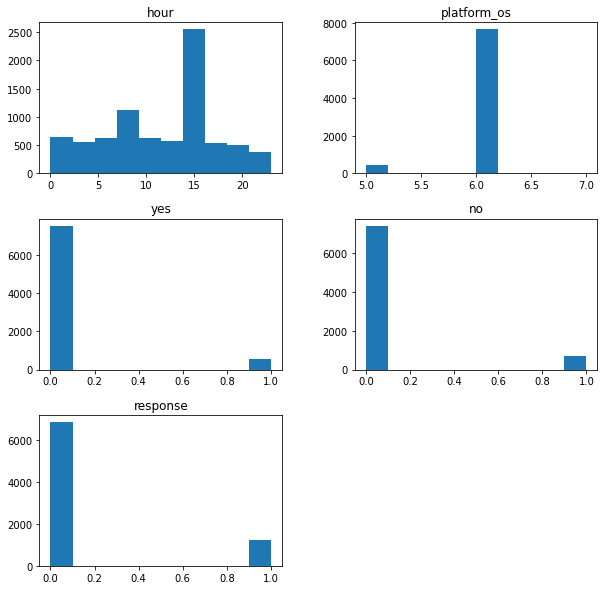

In [12]:
df.hist(grid=False,figsize=(10,10))
plt.show()

From the graph above, we can see that there is no outliers in the numerical column.

In [13]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [14]:
df['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [15]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

There is no outliers in the experiment, yes and no columns.

In [16]:
df['date'].max()

'2020-07-10'

In [17]:
df['date'].min()

'2020-07-03'

The time range for this experiment is from 2020-07-03 to 2020-07-10.

## Define metrics

1.Response Rate = the number of respones/total impressions.<br>2.Positive Response Rate = the number of positive responses/total impressions</br>3. Postive Response Ratio = Positive responses/The total responses

These are business metrics.

## Calculated Metrics

<strong>The positive respones in two groups:</strong>

In [18]:
df.groupby('experiment')['yes'].sum()

experiment
control    264
exposed    308
Name: yes, dtype: int64

<strong>The negative responses in two groups:</strong>

In [19]:
df.groupby('experiment')['no'].sum()

experiment
control    322
exposed    349
Name: no, dtype: int64

<strong>Response Rate in control group:</strong>

In [20]:
rrc=round((264+322)/4071,4)
rrc

0.1439

<strong>Postive Response Rate in control group:</strong>

In [21]:
prrc=round(264/4071,4)
prrc

0.0648

<strong>Positive Response Ratio in control group: </strong>

In [22]:
ratio_c=264/(264+322)
ratio_c

0.45051194539249145

<strong>Postive Response Rate in exposed group:</strong>

In [23]:
prre=round(308/4006,4)
prre

0.0769

<strong>Response Rate in exposed group:</strong>

In [24]:
rre=round((308+349)/4006,4)
rre

0.164

<strong>Positive Response Ratio in exposed group: </strong>

In [25]:
ratio_e=308/(308+349)
ratio_e

0.4687975646879756

## Calculated statistical significance

Define a function to calculate the SE and P-value.

In [26]:
import math

In [27]:
def SE(Xcont,Xexp,Ncont,Ntest):
    pool=(Xcont+Xexp)/(Ncont+Ntest)
    SE=(pool*(1-pool)*(1/Ncont+1/Ntest))**(1/2)
    return SE

In [28]:
def p_value(z):
    p=math.exp(-0.717*z-0.416*z**2)
    return p

### <strong>For Response Rate metric</strong>

In [29]:
Xcont=264+322
Xexp=308+349
Ncont=4071
Ntest=4006

In [30]:
drr=rre-rrc
drr_SE=SE(Xcont,Xexp,Ncont,Ntest)
print(drr,drr_SE)

0.020100000000000007 0.008030488905621176


In [31]:
z=drr/drr_SE
p_value(z)

0.012267701367161116

As we see above, p_value for response rate is around 0.0123, which is smaller than 0.05. Therefore, we have 95% confidence to say that the difference is statistically significant.

### <strong>For Positive Response Rate metric</strong>

In [32]:
Xcont=264
Xexp=308
dprr=prre-prrc
dprr_SE=SE(Xcont,Xexp,Ncont,Ntest)
print(dprr,dprr_SE)

0.0121 0.005708766732960065


In [33]:
z=dprr/dprr_SE
p_value(z)

0.033756343477317347

The p_value for postive response rate is around 0.034, which is smaller than 0.05. Therefore, we can reject the null hypothesis. 

### For Positive Response Ratio

In [34]:
Xcont=264
Xexp=308
Ncont=264+322
Ntest=308+349
d=ratio_e-ratio_c
SE=SE(Xcont,Xexp,Ncont,Ntest)
print(dprr,dprr_SE)

0.0121 0.005708766732960065


In [35]:
z=d/SE
p_value(z)

0.5292024088680277

The p_value is greater than 0.05, which means that we can not reject the null hypothesis. Therefore, there is no significant difference in positive response ratio.

## Conclusion

The difference in response rate and the positive response rate are both statistical significant.However, the difference in Positive Response Ratio is not statistical significant.